# SLU16 - Workflow: Exercise Notebook

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from hashlib import sha1 # just for grading purposes
import json # just for grading purposes

from utils import workflow_steps, data_analysis_steps

def _hash(obj, salt='none'):
    if type(obj) is not str:
        obj = json.dumps(obj)
    to_encode = obj + salt
    return sha1(to_encode.encode()).hexdigest()
import warnings
warnings.filterwarnings('ignore')

In this notebook we will be covering the following:

* Workflow
 * Step 1: Get the data
 * Step 2: Data analysis and preparation
   * 2.1 Data analysis
   * 2.2 Dealing with data problems
   * 2.3 Feature engineering
   * 2.4 Feature selection
 * Step 3: Model training
 * Step 4: Evaluate results
* Pipelines and Custom estimators
    * Pipelines 
        * Doing it "the hard way"
        * What is a pipeline
        * Setting up a pipeline
    * Custom Objects
        * Custom Transformers
        * Custom Estimators

A data science **workflow** defines the phases (or steps) in a data science project. Using a well-defined data science workflow is useful not only to you, but your teammates as it provides a simple way to clearly structure and organize a data science project. Across this specialization we've been covering the different steps in this workflow, but how well are you familiarised with them?

## Exercise 1: Workflow

### Exercise 1.1 - Overall workflow steps

What are the basic workflow steps?

You probably know them already, but we want you to really internalize them. We've given you a list of steps in `workflow_steps`, but it appears that, not only does it have to many steps, some are _probably_ wrong, as well.

Select the correct ones and reorder them!

In [2]:
print("Workflow steps:")
for i in range(len(workflow_steps)):
    print(i+1, ': ', workflow_steps[i])

Workflow steps:
1 :  Iterate
2 :  Establish a Baseline
3 :  Data analysis and preparation
4 :  Google Hackathon solutions
5 :  Evaluate results
6 :  Increase complexity
7 :  Spam
8 :  Get the data
9 :  Watch Netflix
10 :  Train model


In [3]:
# Exercise 1.1. Filter and sort the names of the steps in the workflow_steps list
x=workflow_steps
workflow_steps_answer = ['Get the data', 'Data analysis and preparation', 'Train model', 'Evaluate results', 'Iterate']
    


In [4]:
assert _hash(len(workflow_steps_answer), 'salt0') == '253bd16d7f97f7d7295d404825e32985d257e11f', "your workflow size doesn't look right! Don't forget to remove steps that shouldn't be there"
assert _hash([step.lower() for step in workflow_steps_answer], 'salt0') == '701e2306da9bfde36382bdb6feb80a354916ebf4', "your workflow order doesn't look right! Some steps might be out of place"


## Exercise 1.2: Data Analysis and Preparation

There are way too many substeps in the **Data Analysis and Preparation** step to group them all under a single category. We've given you another list of steps: `data_analysis_steps`.

Aside from being shuffled, it should be fine but keep an eye out. You never know what to expect...

In [5]:
print("Data Analysis and Preparation steps:")
for i in range(len(data_analysis_steps)):
    print(i+1, ': ', data_analysis_steps[i])

Data Analysis and Preparation steps:
1 :  Feature selection
2 :  Data analysis
3 :  Dealing with data problems
4 :  Feature engineering
5 :  Spanish Inquisition


In [6]:
# Exercise 1.2. Filter and sort the names of the steps in the data_analysis_steps list
x = data_analysis_steps
data_analysis_steps_answer = ['Data analysis',
 'Dealing with data problems',
 'Feature engineering',
 'Feature selection']

In [7]:
assert _hash(len(data_analysis_steps_answer), 'salt0') == '3aa298b947129ff226ba1e3f545f8b5ffaa6e557', "your workflow size doesn't look right! Don't forget to remove steps that shouldn't be there"
assert _hash([step.lower() for step in data_analysis_steps_answer], 'salt0') == '658ab90eff4a0cea2bfb51cc89c8db5b4121fa86', "your workflow order doesn't look right! Some steps might be out of place"


<img src="media/spanish_inquisition.gif" width="400" />

## Exercise 2 - Walking down the yellow (workflow) path

There is no template for solving a data science problem. The roadmap changes with every new dataset and new problem. But we do see similar steps in many different projects. Regardless, some steps are fairly common in any process. Let's go through them one by one.

### Exercise 2.1 - Objective

Every DS analysis should start with one question: **What is the problem you are trying to solve?** Clearly stating your problem is the first step to solving it and without a clear problem, you could find yourself down a data-science rabbit-hole.

For this workflow, we are going to analyze the **highest ranked movies on IMDB.com**. The objective? 

> I want to build a model to predict IMDB movie rating based on features like budget, runtime, and votes on the website.

#### Exercise 2.1.1 - Objective
Let's start by importing the dataset. 

In [8]:
df = pd.read_csv('data/IMDB.csv', index_col=0, encoding='latin-1')
df.head()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,"496,092",Biography,Drama,History,96.0,"$20,000,000",134 min,75556,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
2,127 Hours (2010),7.6,"297,075",Adventure,Biography,Drama,82.0,"$18,000,000",94 min,28939,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
3,50/50 (2011),7.7,"283,935",Comedy,Drama,Romance,72.0,"$8,000,000",100 min,28304,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
4,About Time (2013),7.8,"225,412",Comedy,Drama,Fantasy,NaN,"$12,000,000",123 min,38556,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
5,Amour (2012),7.9,"76,121",Drama,Romance,NaN,94.0,"$8,900,000",127 min,11093,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [9]:
# Is the objective clear to you?
# This is just a yes or no question, no need for code here! :P 
answer_2_1_1=True

In [10]:
assert answer_2_1_1, "Don't make the panda sad!"

#### Exercise 2.1.2 - Clasifying the problem
Now that we have our data imported into Pandas and we've checked out the first few rows of our dataframe, there's a few questions we need to answer before we move on:

- *A*: Is this **supervised learning** or **unsupervised learning**? 
- *B*: Is this a **classification problem** or is it a **regression problem**? 
- *C*: Is this a **prediction problem** or an **inference problem**?

Keeping our **objective in mind** how would you classify this problem?

In our example, we are going to be using **regression** to **predict** IMDB rating from Metacritic Ratings, Budgets, Runtime, and Votes.

Save, in `answer_2_1_2`, the value from **A, B and C** that apply to our problem!

In [11]:
# Remove from the string what doesn't apply to our problem (including the '/')
answer_2_1_2 = ["supervised learning","regression problem", "prediction problem"]


In [12]:
assert _hash(len(answer_2_1_2), 'salt0') == 'bb6591f296df2e5dd0324184f4348795b760f11d', "your answer doesn't have the correct size. I've asked you to pick the correct option for three questions"
assert _hash([step.lower() for step in answer_2_1_2], 'salt0') == '316a377a65564efdcfaadfec185b3e53aa41995e', "One or more of your answers is incorrect."

### Exercise 2.2 - Data Exploration and Data Cleaning

Back to our data! Let’s determine which variable is our target and which features we think are important.
Our target is going to be the column titled **Rating** and our features are going to be the columns titled the following: **Rating, TotalVotes, MetaCritic, Budget, Runtime, VotesUS and VotesnUS**, in this order. Remove all of the columns we don’t need for this analysis.

Save the resulting dataframe in `df_clean`. 

Remember, in this case we're telling you what columns are to be kept, but this is something that is part of your workflow process. **A good data exploration and data cleaning is a key factor in the outcome of your model!**

In [13]:
df_clean = df[['Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS' , 'VotesnUS']].copy()
df_clean

,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,8.1,"496,092",96.0,"$20,000,000",134 min,8.3,8.0
2,7.6,"297,075",82.0,"$18,000,000",94 min,7.7,7.6
3,7.7,"283,935",72.0,"$8,000,000",100 min,7.9,7.6
4,7.8,"225,412",NaN,"$12,000,000",123 min,7.8,7.7
5,7.9,"76,121",94.0,"$8,900,000",127 min,7.9,7.8
...,...,...,...,...,...,...,...
114,8.5,"492,285",88.0,"$3,300,000",107 min,8.6,8.4
115,7.7,"295,125",72.0,"Opening Weekend: 49,038,712 ...",NaN,7.9,7.6
116,8.0,"560,736",74.0,"$200,000,000",132 min,8.1,7.9
117,7.8,"556,713",65.0,"$160,000,000",132 min,7.8,7.7


In [14]:
assert isinstance(df_clean, pd.DataFrame), "Should be a dataframe"
assert df_clean.shape == (118, 7), "The shape of the dataframe is different then expected. Have you dropped the uncessessary columns?"
assert _hash([step.lower() for step in df_clean.columns], 'salt0') == 'a721c6ef4e309977818a8875f46459655f645b70', "One or more of your column headers is incorrect."


### Exercise 2.3 - EDA

Exploratory data analysis (EDA) gives the data scientist an opportunity to really learn about the data they are working with. 

Throughout the EDA process, I clean the data. Data from the real world is *very messy*. As I work through the EDA process and learn about the data, I take notes on things I need to fix in order to conduct my analysis. Most times, **Data cleaning and EDA go hand in hand for me**.

The first thing I check is data types. Getting all of the values in the correct format is important. This can involve stripping characters from strings, converting integers to floats, or many other things.

In [15]:
df_clean.dtypes


Rating        float64
TotalVotes     object
MetaCritic    float64
Budget         object
Runtime        object
VotesUS        object
VotesnUS       object
dtype: object

We can observe that the columns **Total Votes**, **Budget** and **Runtime** are not in the expected format (they're all as objects). 

Let's fix these columns one by one:

#### Exercise 2.3.1 - Total Votes
Remove the commas in the column and set its type as `int` 

In [16]:
df_clean.TotalVotes

1      496,092
2      297,075
3      283,935
4      225,412
5       76,121
        ...   
114    492,285
115    295,125
116    560,736
117    556,713
118    309,474
Name: TotalVotes, Length: 118, dtype: object

In [17]:
#hit: str.replace() and as.type() are your friends
df_clean['TotalVotes']=df_clean['TotalVotes'].str.replace(',', '')
df_clean.TotalVotes =df_clean.TotalVotes.astype('int')



In [18]:
assert all(isinstance(item, int) for item in df_clean['TotalVotes']), "TotalVotes should be saved as integers" 
assert _hash(list(df_clean['TotalVotes']), 'salt0') == '8213634d779bf710f03e6ea7b9cafc2671d5f5c4', "Something is wrong with your data conversion"

#### Exercise 2.3.2 - Budget
Set the column Budget as int, cleaning the weird cases as you go

In [19]:
df_clean.Budget

1                                           $20,000,000 
2                                           $18,000,000 
3                                            $8,000,000 
4                                           $12,000,000 
5                                            $8,900,000 
                             ...                        
114                                          $3,300,000 
115    Opening Weekend:         49,038,712           ...
116                                        $200,000,000 
117                                        $160,000,000 
118                                        $150,000,000 
Name: Budget, Length: 118, dtype: object

In [20]:
# remove cases where the budget contains the words "Opening", "Pathé" and "BBC"

df_clean = df_clean[~df_clean.Budget.str.contains("Opening|Pathé|BBC")]

# remove weird string cases from the column - this is a freeby for you ;)
df_clean.Budget = df_clean.Budget.str.replace('[^\x00-\x7F]','')

# remove commas and dollar strings

df_clean.Budget = df_clean.Budget.str.replace('$','')
df_clean.Budget = df_clean.Budget.str.replace(',' ,'')                                     

# set type as int
df_clean.Budget = df_clean.Budget.astype('int')

In [21]:
assert all(isinstance(item, int) for item in df_clean['Budget']), "Budget should be saved as integers" 
assert _hash(list(df_clean['Budget']), 'salt0') == '36348180fcef98c4a20e296250c54dcba9150ce4', "Something is wrong with your data cleaning"

#### Exercise 2.3.3 - Runtime
Extract the runtime time in minutes from this column. *Don't convert this column.* 

In [22]:
df_clean.Runtime

1      134 min
2       94 min
3      100 min
4      123 min
5      127 min
        ...   
112    140 min
114    107 min
116    132 min
117    132 min
118    108 min
Name: Runtime, Length: 99, dtype: object

In [23]:
# hint: str.split() is your friend
new= df_clean.Runtime.str.split(' ', expand=True)
df_clean.Runtime= new[0]


In [24]:
assert all(isinstance(item, object) for item in df_clean['Runtime']), "Runtime should be left as object" 
assert _hash(list(df_clean['Runtime']), 'salt0') == 'd17030b4117d1ea61ead4b8b3ddfdb82a0bfc0bf', "Something is wrong with your data cleaning"

### Exercise 2.4 - Drop missing values
Finding missing values is quite common. Just drop them from out clean dataframe.

In [25]:
df_clean = df_clean.dropna()


In [26]:
assert isinstance(df_clean, pd.DataFrame), "Should be a dataframe"
assert df_clean.shape == (92, 7), "The shape of the dataframe is different then expected. Have you dropped the rows with missing data?"

### Exercise 2.5 - Set type of remaining columns

Finally we can set the type of **Runtime**. as int, and **VotesnUS** and **VotesUS** as float.

In [27]:
df_clean.Runtime = df_clean.Runtime.astype(int)
df_clean.VotesnUS = df_clean.VotesnUS.astype(float)
df_clean.VotesUS = df_clean.VotesUS.astype(float)



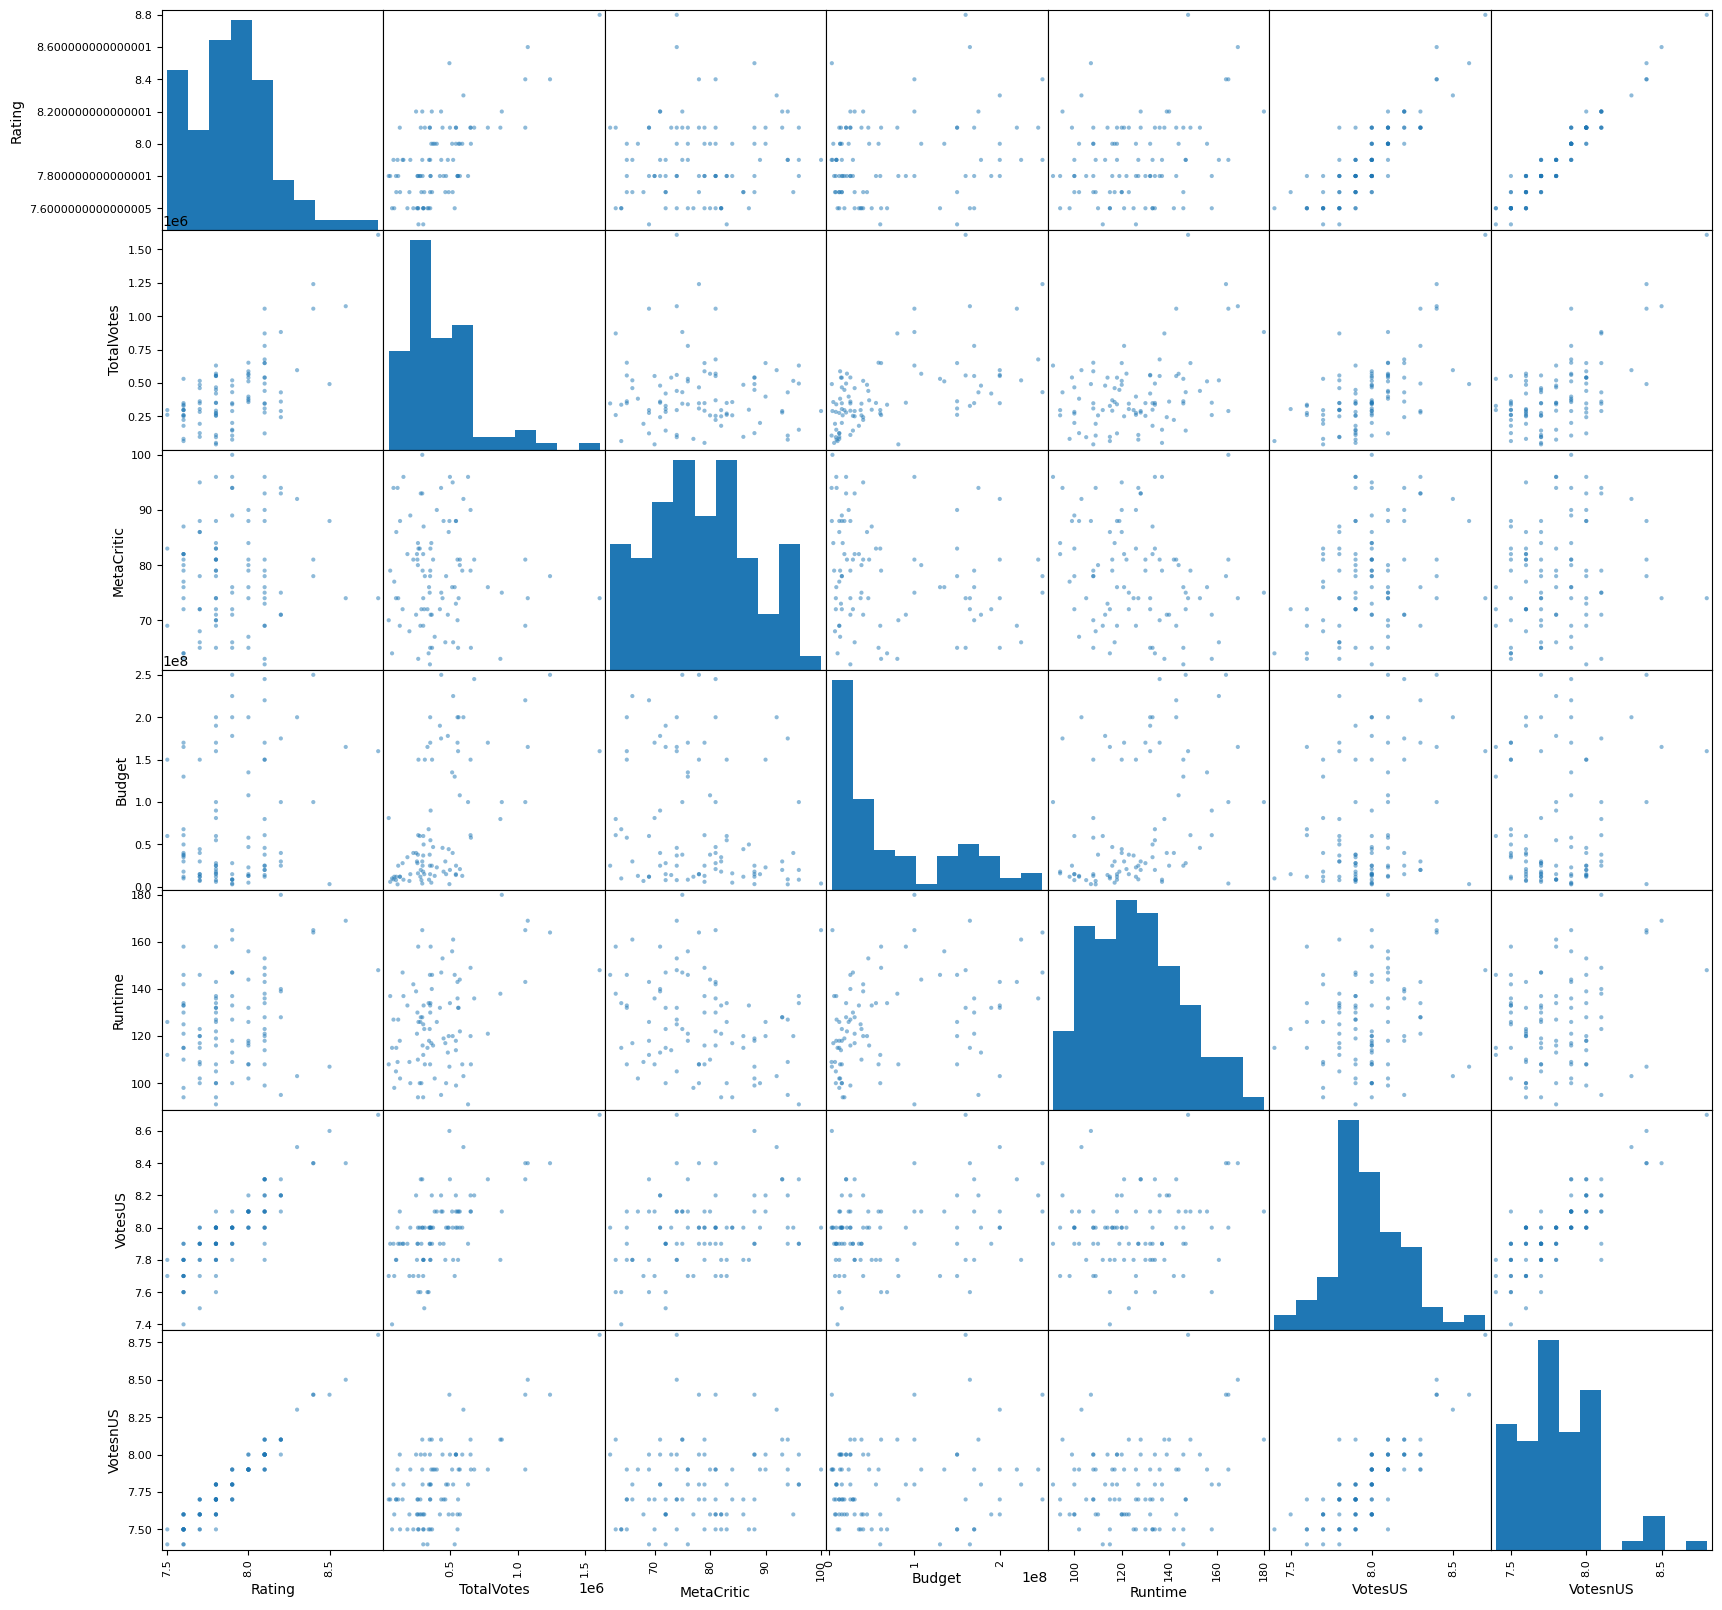

In [28]:
assert all(isinstance(item, int) for item in df_clean['Runtime']), "Runtime should be saved as integers" 
assert all(isinstance(item, float) for item in df_clean['VotesnUS']), "VotesnUS should be saved as integers" 
assert all(isinstance(item, float) for item in df_clean['VotesUS']), "VotesUS should be saved as integers" 

pd.plotting.scatter_matrix(df_clean, figsize=(20,20))
plt.show()

Uff! That took quite some time, but now we have a clean and tidy dataframe to work with!

## Exercise 3 - Baseline modeling

As a data scientist, you will build a lot of models. You will use a variety of algorithms to perform a wide variety of tasks. You will need to use intuition and experience to decide when certain models are appropriate! 

But when costructing your baseline model, the simpler, the better! 

Let's start!

### Exercise 3.1 - Separate your target value 

Separate into `X` and `y` your features and your target. Order the columns in `X` as in exercise 2.2. 

In [29]:
df_clean_= df_clean.copy()
df_clean_

,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,8.1,496092,96.0,20000000,134,8.3,8.0
2,7.6,297075,82.0,18000000,94,7.7,7.6
3,7.7,283935,72.0,8000000,100,7.9,7.6
5,7.9,76121,94.0,8900000,127,7.9,7.8
6,7.7,486840,86.0,44500000,120,8.0,7.6
...,...,...,...,...,...,...,...
112,8.2,361049,71.0,25000000,140,8.2,8.1
114,8.5,492285,88.0,3300000,107,8.6,8.4
116,8.0,560736,74.0,200000000,132,8.1,7.9
117,7.8,556713,65.0,160000000,132,7.8,7.7


In [30]:
X = df_clean_.drop('Rating',axis=1)
y = df_clean_['Rating']



In [31]:
assert _hash(list(y), 'salt0') == 'a285222c126f8617cd0179da57e9879065213a75', "Have you picked the right column as the target?"
assert X.shape == (92, 6), "The shape of the dataframe is different then expected. Have you dropped the target?"
assert _hash(sorted(X.columns), 'salt0') == '91dadf1574a4bf5ac09cbc839a67393502645794', "Have you included the right columns in X?"

### Exercise 3.2 - Scale your data
As we're using a linear regression, you should scale your X dataframe. Use `MinMaxScaler`

In [32]:
corr_X = MinMaxScaler().fit_transform(X)


In [33]:
assert _hash(sorted(corr_X[:,1]), 'salt0') == '1e067622da29527aa7f0ea65f8c60d6eb202dd3a', "have you used the correct scaler?"


### Exercise 3.3 - Split data

Split your dataset into test and train data, using `test_size=0.2` on your `train_test_split()`

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=0.2)

In [35]:
assert (X_train.shape, X_test.shape, y_train.shape, y_test.shape) == ((73, 6), (19, 6), (73,), (19,)), "have you split the data correctly? Test size should be 0.2"

### Exercise 3.4 - Finally! The model!

We can finally make our predictions with our Linear Regression! 

In [36]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train )
predictions = lm.predict(X_test)


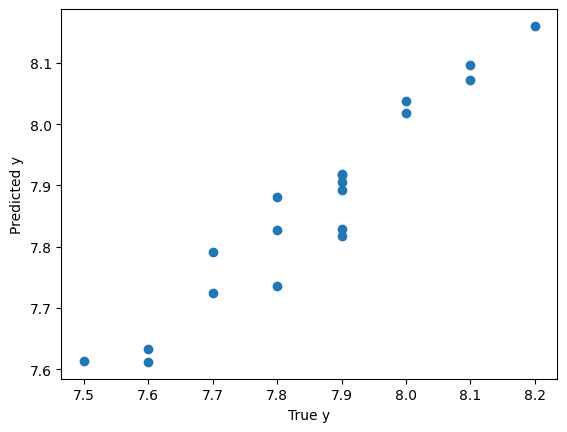

R-squared Score: 0.9153623377321797


In [37]:
assert predictions.size == 19
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

print ('R-squared Score:', model.score(X_test, y_test)) 

Our model is not performing bad at all! If you want to improve it, you should make **small alterations**, **one at a time**! Keeping track of your changes is crucial to know exactly what change is helping or hurting your model! 

## Exercise 4 - Pipelines!!!!! 

We've already loaded and splitted a dataset for the following exercises. They're stored in the `X_train`, `X_test`, `y_train` and `y_test` variables.

In a perfect world, where you have all your data clean and ready-to-go, you can create your pipeline with just Scikit-learn's Transformers. However, in the real world, that's not the case, and you'll need to create custom Transformers to get the job done. Take a look at the data set, what do you see?

In [38]:
from utils import get_dataset

new_X, new_y = get_dataset()  # preloaded dataset
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.33)

In [39]:
new_X

,17,leg_1,7,arm_2,2,11,4,16,0,14,...,12,10,15,9,19,18,8,6,arm_0,1
0,-0.334501,lee,-0.653329,Betsey,-0.474945,2.143944,0.504987,-0.792521,NaN,0.633919,...,1.765454,-0.071335,0.087142,-0.661786,-1.200296,0.865755,0.186454,0.404982,tribesman,0.029102
1,1.375707,Runge,0.125576,bottleneck,-0.150056,0.321357,NaN,1.189470,1.613711,0.421921,...,-0.173072,-1.158068,0.963360,-0.244157,-0.297564,0.701173,0.453534,0.015579,sloven,0.659924
2,1.189017,Hackett,-0.570746,neuropsychiatric,1.420504,-1.122722,-0.623141,-0.637740,NaN,0.382410,...,-0.832356,-0.270624,-1.692005,0.289169,-0.637387,-0.555477,0.492451,0.471416,Shakespearian,0.950573
3,-0.689188,woodchuck,0.197911,systematic,1.735964,0.059630,1.317394,1.049553,0.698223,-0.646937,...,-0.651418,0.852392,-1.106450,0.895193,2.075261,0.197600,0.393485,-0.483886,semper,-0.320670
4,-0.968344,inkling,-1.334025,kingpin,0.105376,-0.988591,-0.982487,-0.989628,0.179894,-1.103589,...,-0.601368,-0.348985,1.303736,0.918317,0.550052,-0.224633,1.392002,0.319782,compensable,-0.222100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.755341,scarface,0.971571,ephemeris,-0.248964,0.711615,1.179297,1.551152,-1.534114,-1.124642,...,0.645376,-1.217220,-0.763516,0.332314,2.060748,0.067518,1.277677,1.368632,antebellum,1.431401
96,0.640843,epithelial,0.572583,culminate,-0.571179,1.503398,-1.001620,-0.247177,-0.220964,0.877362,...,1.399355,1.039670,-0.977637,0.208383,1.797687,-0.281100,0.026886,0.924634,irresolution,-0.545612
97,-0.309172,cutler,-0.478749,experiment,0.222134,-1.081057,0.096121,0.938284,-0.039555,1.053153,...,1.255756,1.985223,-0.511036,0.028318,-0.434496,-0.462275,0.681501,-0.894607,delectate,-1.604993
98,-0.305225,inveigle,-0.186971,nod,-0.609512,0.028181,0.010353,1.390208,1.085896,-0.009119,...,0.056650,-1.648321,0.735948,-0.025027,-1.065114,-1.311836,0.474698,0.529693,zag,1.203166


While crunching your data, you probably found two issues:

There are 4 columns whose name starts with either arm or leg which are all filled with gibberish.
There are some values missing in some columns.
So, first things first, let's get rid of those columns through a **Custom Transformer**, so we can plug it in a Scikit Pipeline after.

In [40]:
df_=new_X.copy()

In [41]:
df_.columns[df_.columns.str.startswith('arm') | df_.columns.str.startswith('leg')]


Index(['leg_1', 'arm_2', 'leg_3', 'arm_0'], dtype='object')

### Exercise 4.1 - Custom Transformer

In [44]:
# Create a pipeline step called RemoveLimbs that removes any
#column whose name starts with the string 'arm' or ´leg´
class RemoveLimbs(TransformerMixin):

    def transform(self,X,y=None):
        self.columns = X.columns[X.columns.str.startswith('arm') | X.columns.str.startswith('leg')]
        return X.drop(self.columns,axis=1).copy()

    def fit(self, X, y=None):
        return self 






In [45]:
assert _hash(sorted(RemoveLimbs().fit_transform(new_X).columns), 'salt5') == '71443dfc3077d773d4c74e958dadf91dc2cc148a'
assert _hash(list(map(lambda col: col.startswith('arm') or col.startswith('leg'), RemoveLimbs().fit_transform(new_X_train).columns)), 'salt6') == 'ce45cf3759d2210f2d1315f1673b18f34e3ac711'

### Exercise 4.2 - Pipelines are the best!

Now that we have our Custom Transformer in place, we can design our pipeline! 

Create a pipeline with the following steps:

1. Removes limbs columns
2. Imputes missing values with the mean
3. Has a Random Forest Classifier as the last step

You may use `make_pipeline` to create your pipeline with as many steps as you want as long as the first two are the Custom Transformer you developed previously, a `SimpleImputer` as the second step, and a `RandomForestClassifier` as the last step. Save your pipeline into a variable named `pipeline`!

In [46]:
pipeline = make_pipeline(
    RemoveLimbs(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=10)
    
)
    

In [47]:
assert _hash(pipeline.steps[0][0], 'salt7') == '471b02068ac2c4f479c2e9f85f4b3dc2179bb841'
assert _hash(pipeline.steps[1][0], 'salt8') == 'ca83eaea1a7e243fa5574cfa6f52831166ee0f32'
assert _hash(pipeline.steps[-1][0], 'salt9') == '0d66ba4309ad4939673169e74f87088dcadd510b'

Does it work? Let's check it out on our dataset!

In [48]:
pipeline.fit(new_X_train, new_y_train)
new_y_pred = pipeline.predict(new_X_test)
accuracy_score(new_y_test, new_y_pred)

0.9393939393939394

It doesn't get much cleaner that this, does it?

For an extra challenge, Go back to exercises 2 and 3 and follow our workflow but with a Pipeline! For each special processing we've done, you can create a custom transformer for that column! 

Dominating pipelines and custom transformers can be a huge time saver! And there's the hackathon ahead...

**Good luck!**